# Explore Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set()

In [2]:
training_data = pd.read_csv('train.csv')
training_data.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
training_data['Test'] = np.where(((training_data['Sex'] == 'female') & (training_data['Age'] <=5 )), 'yes', 'no')
training_data.groupby('Test').size()

Test
no     870
yes     21
dtype: int64

In [6]:
training_data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,no
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,no
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,no
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,no
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,no
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,no


## Let's start with % of Survival

In [7]:
training_data.groupby(['Survived']).size().reset_index(name='count')

,Survived,count
0,0,549
1,1,342


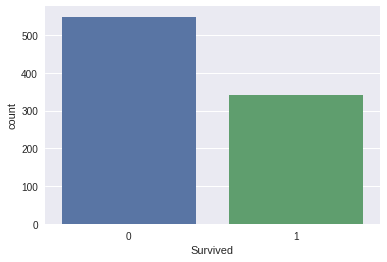

In [8]:
sns.countplot(x='Survived', data=training_data)

# First result

In [9]:
testing_data = pd.read_csv('test.csv')
testing_data['Survived'] = 0
testing_data[['PassengerId', 'Survived']].to_csv('result_01.csv', index=False)

In [10]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Look at Sex variable

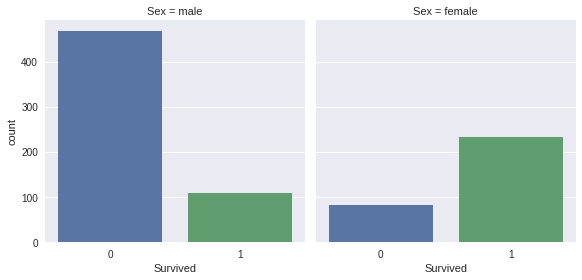

In [11]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=training_data)

In [12]:
training_data.groupby('Sex').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


In [13]:
training_data.groupby('Sex').Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

## % of Male vs Female is survival

In [14]:
sum = training_data[training_data.Sex == 'female'].Survived.sum()
count = training_data[training_data.Sex == 'female'].Survived.count()
sum/count

0.7420382165605095

In [15]:
sum = training_data[training_data.Sex == 'male'].Survived.sum()
count = training_data[training_data.Sex == 'male'].Survived.count()
sum/count

0.18890814558058924

# Second result

In [16]:
testing_data['Survived'] = testing_data['Sex'] == 'female'
testing_data['Survived'] = testing_data.Survived.apply(lambda x: int(x))
testing_data.head(n=10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [17]:
testing_data[['PassengerId', 'Survived']].to_csv('result_02.csv', index=False)

# Look at Pclass variable

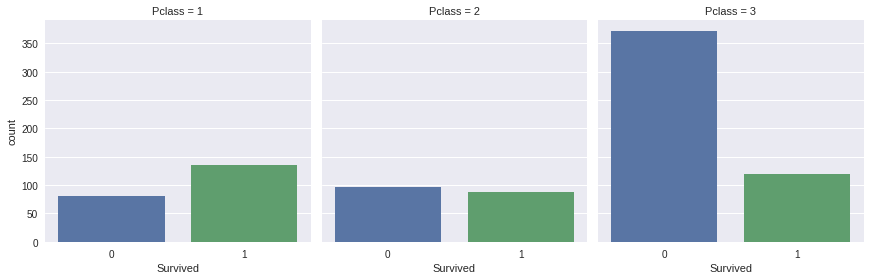

In [18]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=training_data)

# Look at Embarked variable

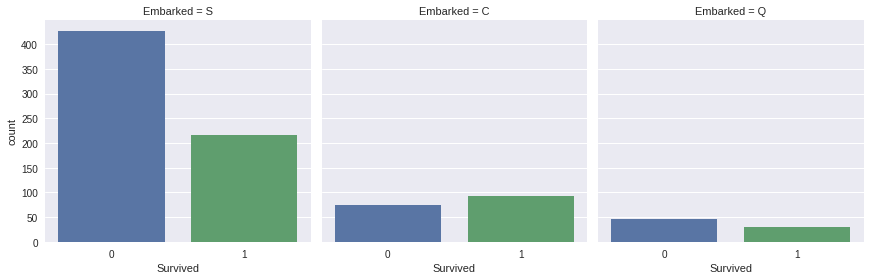

In [19]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=training_data)

# Working with numerical variables

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


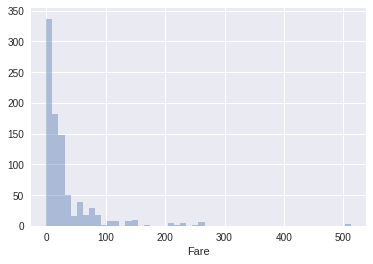

In [20]:
sns.distplot(training_data.Fare, kde=False)

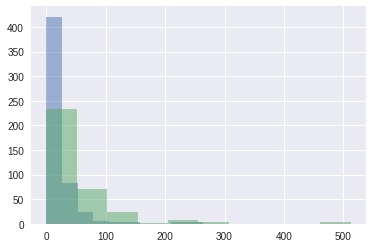

In [21]:
training_data.groupby('Survived').Fare.hist(alpha=0.5);

In [22]:
training_data.groupby('Survived').Fare.describe()

Survived       
0         count    549.000000
          mean      22.117887
          std       31.388207
          min        0.000000
          25%        7.854200
          50%       10.500000
          75%       26.000000
          max      263.000000
1         count    342.000000
          mean      48.395408
          std       66.596998
          min        0.000000
          25%       12.475000
          50%       26.000000
          75%       57.000000
          max      512.329200
Name: Fare, dtype: float64

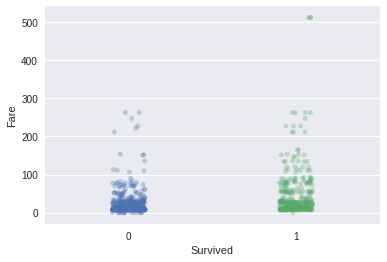

In [23]:
sns.stripplot(x='Survived', y='Fare', data=training_data, alpha=0.3, jitter=True)

In [24]:
training_data.Age.unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [25]:
import re

In [26]:
training_data['Title'] = training_data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Test,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,no,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,no,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,no,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no,Mr


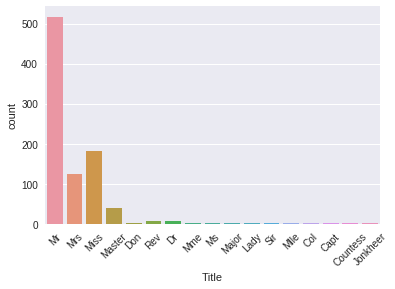

In [27]:
sns.countplot(x='Title', data=training_data);
plt.xticks(rotation=45);

In [28]:
training_data['CategoricalFare']=pd.qcut(training_data['Fare'], 4, labels=False)
training_data['CategoricalAge']=pd.qcut(training_data['Age'], 4, labels=False)

In [29]:
training_data.groupby(['CategoricalFare', 'CategoricalAge']).size()

CategoricalFare  CategoricalAge
0                0.0               32
                 1.0               57
                 2.0               32
                 3.0               22
1                0.0               49
                 1.0               59
                 2.0               54
                 3.0               38
2                0.0               51
                 1.0               29
                 2.0               47
                 3.0               50
3                0.0               47
                 1.0               38
                 2.0               42
                 3.0               67
dtype: int64

# Try third result

In [30]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')
training_data.drop(['PassengerId','Name','Ticket', 'Embarked', 'Cabin'], axis=1, inplace=True)
testing_data.drop(['Name','Ticket', 'Embarked', 'Cabin'], axis=1, inplace=True)
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 22.9+ KB


In [31]:
testing_data["Fare"].fillna(testing_data["Fare"].median(), inplace=True)
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 22.9+ KB


In [32]:
training_data['Fare'] = training_data['Fare'].astype(int)
testing_data['Fare']    = testing_data['Fare'].astype(int)

fare_dead = training_data["Fare"][training_data["Survived"] == 0]
fare_survived     = training_data["Fare"][training_data["Survived"] == 1]

avgerage_fare = pd.DataFrame([fare_dead.mean(), fare_survived.mean()])
std_fare      = pd.DataFrame([fare_dead.std(), fare_survived.std()])

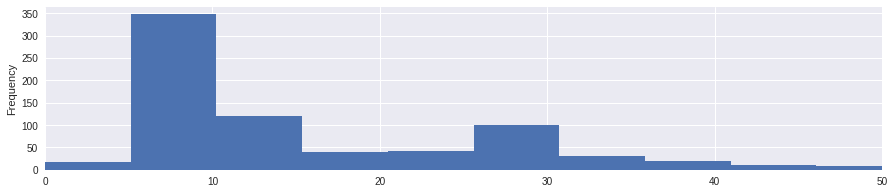

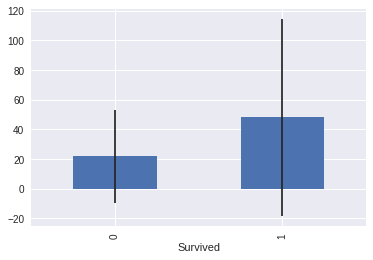

In [33]:
training_data['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

In [34]:
training_data['Family'] =  training_data["Parch"] + training_data["SibSp"]
training_data['Family'].loc[training_data['Family'] > 0] = 1
training_data['Family'].loc[training_data['Family'] == 0] = 0

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
testing_data['Family'] =  testing_data["Parch"] + testing_data["SibSp"]
testing_data['Family'].loc[testing_data['Family'] > 0] = 1
testing_data['Family'].loc[testing_data['Family'] == 0] = 0

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
training_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
testing_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

[Text(0,0,'With Family'), Text(0,0,'Alone')]

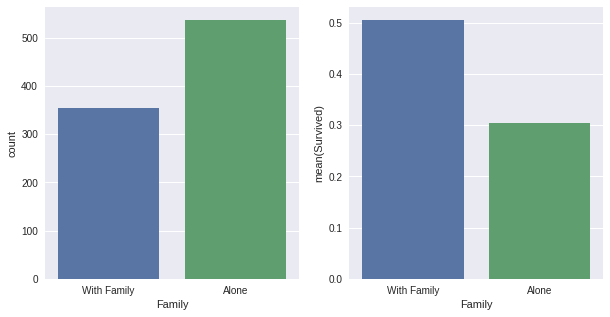

In [37]:
fig, (axis1,axis2) = plt.subplots(1, 2, sharex=True, figsize=(10,5))
sns.countplot(x='Family', data=training_data, order=[1,0], ax=axis1)
family_percent = training_data[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_percent, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

In [38]:
def make_data(passenger):
    age, sex = passenger
    return 'child' if age <= 15 else sex
    
training_data['Person'] = training_data[['Age','Sex']].apply(make_data, axis=1)
testing_data['Person'] = testing_data[['Age','Sex']].apply(make_data, axis=1)

In [39]:
training_data = training_data.drop(['Sex'], axis=1)
testing_data.drop(['Sex'], axis=1, inplace=True)

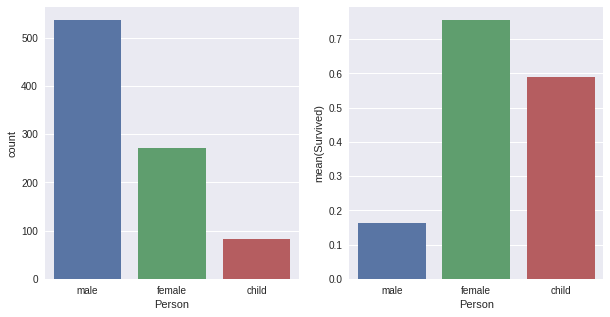

In [40]:
person_dummies_titanic  = pd.get_dummies(training_data['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test = pd.get_dummies(testing_data['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

training_data = training_data.join(person_dummies_titanic)
testing_data    = testing_data.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Person', data=training_data, ax=axis1)
person_percent = training_data[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_percent, ax=axis2, order=['male','female','child'])

training_data.drop(['Person'], axis=1, inplace=True)
testing_data.drop(['Person'], axis=1, inplace=True)

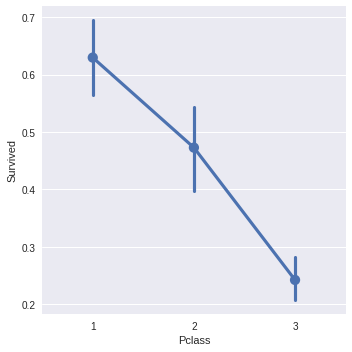

In [41]:
sns.factorplot('Pclass','Survived',order=[1,2,3], data=training_data,size=5)

pclass_dummies_titanic  = pd.get_dummies(training_data['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(testing_data['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

training_data.drop(['Pclass'],axis=1,inplace=True)
testing_data.drop(['Pclass'],axis=1,inplace=True)

training_data = training_data.join(pclass_dummies_titanic)
testing_data    = testing_data.join(pclass_dummies_test)

In [42]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Age         714 non-null float64
Fare        891 non-null int64
Family      891 non-null int64
Child       891 non-null uint8
Female      891 non-null uint8
Class_1     891 non-null uint8
Class_2     891 non-null uint8
dtypes: float64(1), int64(3), uint8(4)
memory usage: 31.4 KB


In [43]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Age            332 non-null float64
Fare           418 non-null int64
Family         418 non-null int64
Child          418 non-null uint8
Female         418 non-null uint8
Class_1        418 non-null uint8
Class_2        418 non-null uint8
dtypes: float64(1), int64(3), uint8(4)
memory usage: 14.8 KB


In [44]:
average_age_titanic   = training_data["Age"].mean()
std_age_titanic       = training_data["Age"].std()
count_nan_age_titanic = training_data["Age"].isnull().sum()

average_age_test   = testing_data["Age"].mean()
std_age_test       = testing_data["Age"].std()
count_nan_age_test = testing_data["Age"].isnull().sum()

rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

training_data["Age"][np.isnan(training_data["Age"])] = rand_1
testing_data["Age"][np.isnan(testing_data["Age"])] = rand_2

training_data['Age'] = training_data['Age'].astype(int)
testing_data['Age'] = testing_data['Age'].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [45]:
X_train = training_data.drop("Survived",axis=1)
Y_train = training_data["Survived"]
X_test  = testing_data.drop("PassengerId",axis=1).copy()

In [46]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.95959595959595956

In [47]:
testing_data = pd.read_csv('test.csv')
testing_data['Survived'] = 0
testing_data[['PassengerId', 'Survived']].to_csv('result_03.csv', index=False)